In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import load_iris

## データ読み込み


In [2]:
iris = load_iris()

data_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
data_iris["target"] = iris.target

print(data_iris.head())
print(data_iris.shape)

   sepal length (cm)  sepal width (cm)  ...  petal width (cm)  target
0                5.1               3.5  ...               0.2       0
1                4.9               3.0  ...               0.2       0
2                4.7               3.2  ...               0.2       0
3                4.6               3.1  ...               0.2       0
4                5.0               3.6  ...               0.2       0

[5 rows x 5 columns]
(150, 5)


In [3]:
data_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [0]:
## 標準化
scaler = StandardScaler()
data_std = scaler.fit_transform(data_iris[iris.feature_names])

## 可視化

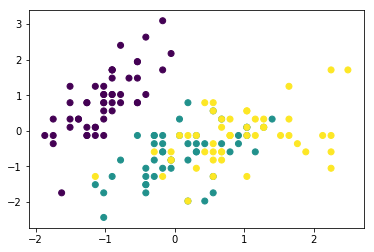

In [5]:
plt.scatter(data_std[:, 0], data_std[:, 1], c=data_iris["target"])

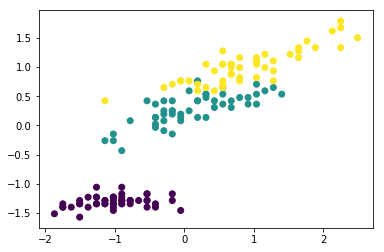

In [6]:
plt.scatter(data_std[:, 0], data_std[:, 2], c=data_iris["target"])

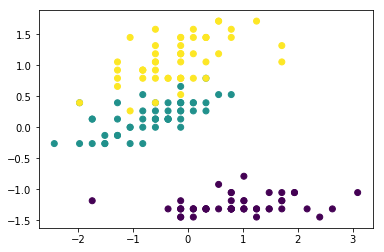

In [7]:
plt.scatter(data_std[:, 1], data_std[:, 3], c=data_iris["target"])

## K平均法

### 2つにクラスタリング

In [8]:
k_means = KMeans(n_clusters=2)
k_means.fit(data_std[:, [0, 1]])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [9]:
print(k_means.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


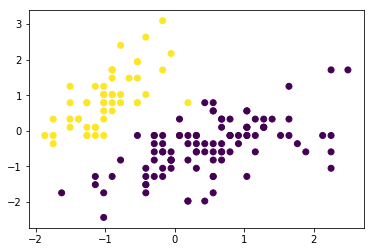

In [10]:
plt.scatter(data_std[:, 0], data_std[:, 1], c = k_means.labels_)

In [11]:
print(data_iris[k_means.labels_ == 0]["target"].value_counts())

2    50
1    49
0     1
Name: target, dtype: int64


In [12]:
print(data_iris[k_means.labels_ == 1]["target"].value_counts())

0    49
1     1
Name: target, dtype: int64


### 別の例

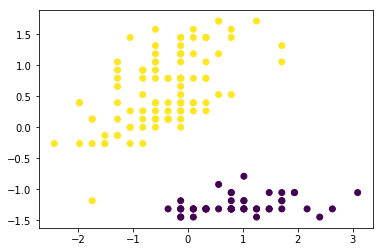

0    49
Name: target, dtype: int64
2    50
1    50
0     1
Name: target, dtype: int64


In [13]:
k_means2 = KMeans(n_clusters=2, random_state=0, n_jobs=-1)
k_means2.fit(data_std[:, [1, 3]])

plt.scatter(data_std[:, 1], data_std[:, 3], c = k_means2.labels_)
plt.show()

print(data_iris[k_means2.labels_ == 0]["target"].value_counts())
print(data_iris[k_means2.labels_ == 1]["target"].value_counts())

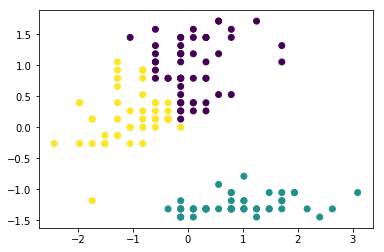

2    39
1    15
Name: target, dtype: int64
0    49
Name: target, dtype: int64
1    35
2    11
0     1
Name: target, dtype: int64


In [14]:
k_means3 = KMeans(n_clusters=3, random_state=0, n_jobs=-1)
k_means3.fit(data_std[:, [1, 3]])

plt.scatter(data_std[:, 1], data_std[:, 3], c = k_means3.labels_)
plt.show()


print(data_iris[k_means3.labels_ == 0]["target"].value_counts())
print(data_iris[k_means3.labels_ == 1]["target"].value_counts())
print(data_iris[k_means3.labels_ == 2]["target"].value_counts())

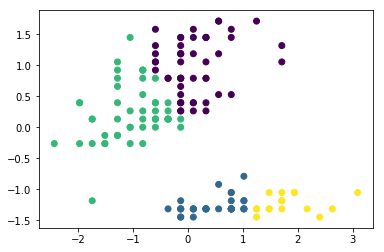

2    37
1    14
Name: target, dtype: int64
0    33
Name: target, dtype: int64
1    36
2    13
0     1
Name: target, dtype: int64
0    16
Name: target, dtype: int64


In [15]:
k_means4 = KMeans(n_clusters=4, random_state=0, n_jobs=-1)
k_means4.fit(data_std[:, [1, 3]])

plt.scatter(data_std[:, 1], data_std[:, 3], c = k_means4.labels_)
plt.show()

print(data_iris[k_means4.labels_ == 0]["target"].value_counts())
print(data_iris[k_means4.labels_ == 1]["target"].value_counts())
print(data_iris[k_means4.labels_ == 2]["target"].value_counts())
print(data_iris[k_means4.labels_ == 3]["target"].value_counts())